# Finding Heavy Traffic Indicators on I-94

In [2]:
import pandas as pd
traffic=pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [3]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [4]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [5]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


The results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.

## Exploring Traffic Volume

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

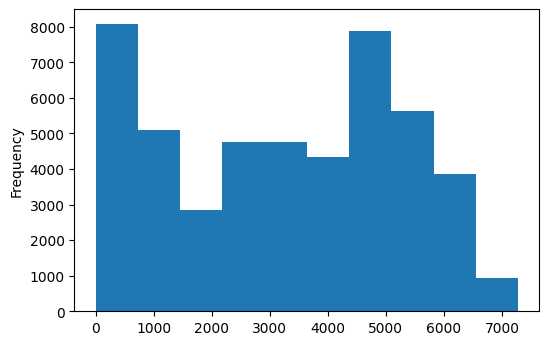

In [8]:
traffic['traffic_volume'].plot.hist()

In [9]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Divide data into night and day

In [11]:
traffic['date_time']=pd.to_datetime(traffic['date_time'])

In [12]:
traffic['date_time'].head()

0   2012-10-02 09:00:00
1   2012-10-02 10:00:00
2   2012-10-02 11:00:00
3   2012-10-02 12:00:00
4   2012-10-02 13:00:00
Name: date_time, dtype: datetime64[ns]

In [13]:
day_traffic=traffic[(traffic['date_time'].dt.hour>=7) & (traffic['date_time'].dt.hour<19)]
night_traffic=traffic[(traffic['date_time'].dt.hour>=19) | (traffic['date_time'].dt.hour<7)]

In [14]:
day_traffic['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [15]:
night_traffic['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

In [16]:
day_traffic['traffic_volume'].value_counts(sort=True) #sort by frequencies

5104    24
4694    23
4866    23
4477    23
4958    23
        ..
2218     1
2058     1
2026     1
3698     1
0        1
Name: traffic_volume, Length: 4831, dtype: int64

In [17]:
night_traffic['traffic_volume'].value_counts(sort=True) #sort by frequencies

353     50
356     50
340     47
351     44
333     42
        ..
5924     1
5988     1
3943     1
6004     1
0        1
Name: traffic_volume, Length: 4390, dtype: int64

(0.0, 8000.0)

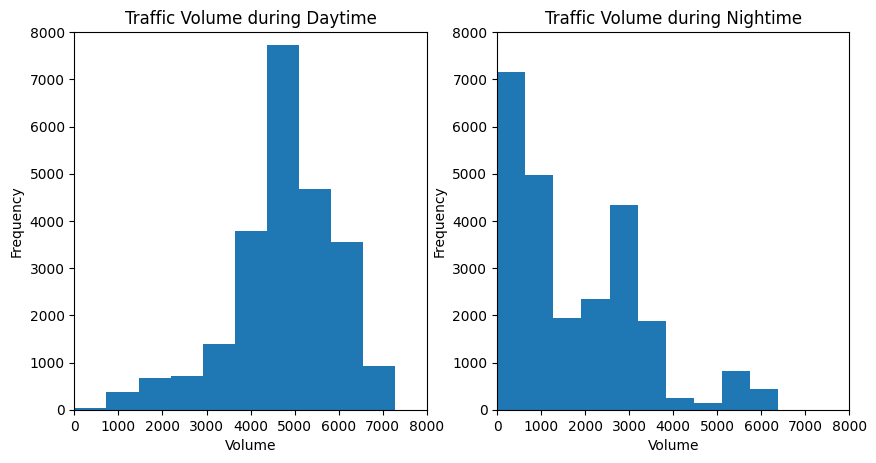

In [18]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(day_traffic['traffic_volume'])
plt.title('Traffic Volume during Daytime')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.ylim([0,8000])
plt.xlim([0,8000])


plt.subplot(1,2,2)
plt.hist(night_traffic['traffic_volume'])
plt.title('Traffic Volume during Nightime')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.ylim([0,8000])
plt.xlim([0,8000])

In [19]:
#What shape do the histograms have and what does that indicate?
#If the traffic is light at night, and our goal is to find indicators of heavy traffic, should we still be using the nighttime data?

In [20]:
day_traffic['month'] = day_traffic['date_time'].dt.month
by_month = day_traffic.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-20-232974b20408>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

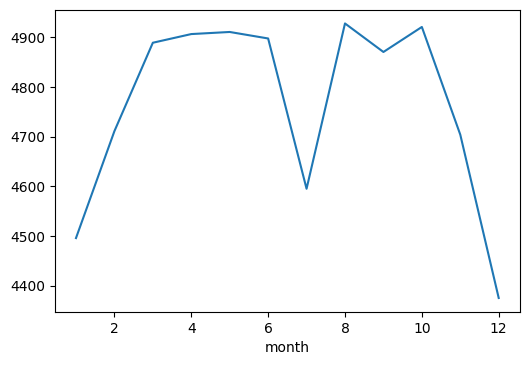

In [21]:
by_month['traffic_volume'].plot()


In [22]:
#Do you notice any interesting exception?

In [23]:
day_traffic['dayofweek'] = day_traffic['date_time'].dt.dayofweek
by_dayofweek = day_traffic.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

<ipython-input-23-5d27d7419ca4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

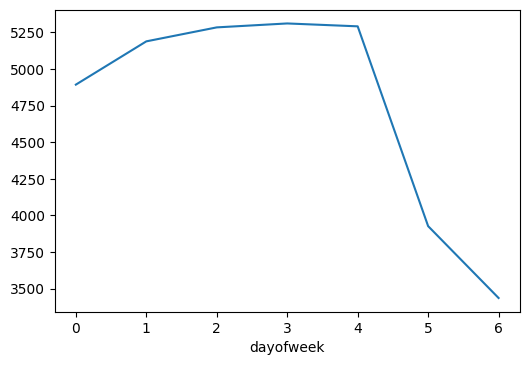

In [24]:
by_dayofweek['traffic_volume'].plot()

In [25]:
#Do you notice any difference between business days and the weekend?

In [26]:
day_traffic['hour'] = day_traffic['date_time'].dt.hour
bussiness_days = day_traffic.copy()[day_traffic['dayofweek'] <= 4] # 4 == Friday
weekend = day_traffic.copy()[day_traffic['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


<ipython-input-26-b2a7dc28ffc0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(4000.0, 6250.0)

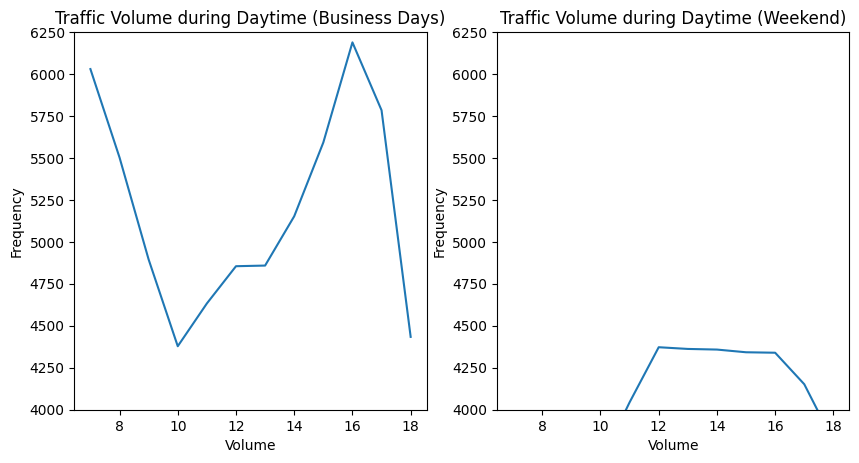

In [27]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot()
plt.title('Traffic Volume during Daytime (Business Days)')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.ylim([4000,6250])



plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot()
plt.title('Traffic Volume during Daytime (Weekend)')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.ylim([4000,6250])

In [34]:
by_weather_main = day_traffic.groupby('weather_main').mean()
by_weather_description = day_traffic.groupby('weather_description').mean()


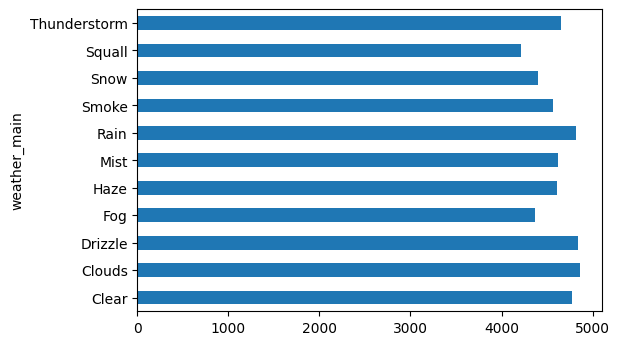

In [35]:
by_weather_main['traffic_volume'].plot.barh()

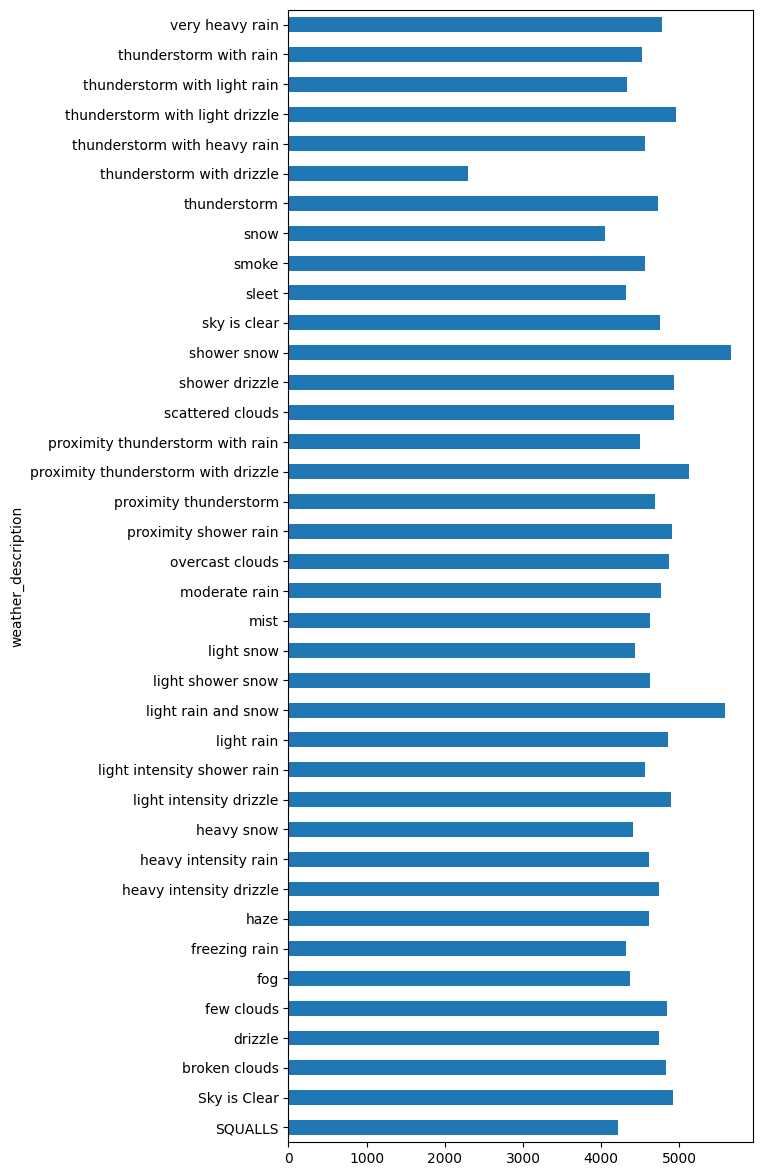

In [38]:
by_weather_description['traffic_volume'].plot.barh(figsize=(6,15))